<a href="https://colab.research.google.com/github/GoryachevDaniil/python_for_data_analysis/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline                 
# устанавливает серверную часть matplotlib в серверную часть 'inline' :
# %matplotlib notebook             ## активирует серверную часть nbagg, которая обеспечивает интерактивность.
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows=10

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import data_table

Mounted at /content/drive


In [3]:
tr_mcc_codes = pd.read_csv('/content/drive/MyDrive/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv("/content/drive/MyDrive/tr_types.csv", sep=';')
transactions = pd.read_csv("/content/drive/MyDrive/transactions.csv", sep=',', nrows=1000000)
gender_train = pd.read_csv("/content/drive/MyDrive/gender_train.csv", sep=',')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [4]:
trans = transactions.merge(gender_train, how='left')
trans = trans.merge(tr_mcc_codes, how='inner')
trans = trans.merge(tr_types, how='inner')

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [144]:
df = trans.copy()
abs(round(df[(df['gender'] == 1) & (df['amount'] < 0)]['amount'].mean() - df[(df['gender'] == 0) & (df['amount'] < 0)]['amount'].mean(), 2))

32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [99]:
df = trans.copy()
df['conc'] = df['mcc_code'].astype(str) + df['tr_type'].astype(str)
df = df[df['amount'] < 0]
df.groupby(['conc']).amount.agg(['count', 'var']).query('count >= 10')['var'].agg(lambda x: round(max(x) / min(x)))

9170599

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df = trans.copy()

df = df[df['amount'] > 0]
df = df[df['gender'].notna()]
df['max_income'] = df.groupby(['gender', 'tr_type']).amount.transform('max')

df_1 = df[df['gender'] == 1]
df_1.drop_duplicates(subset='tr_type', keep='first', inplace=True)
df1 = df_1.nsmallest(5, 'max_income')

df_2 = df[df['gender'] == 0]
df_2.drop_duplicates(subset='tr_type', keep='first', inplace=True)
df2 = df_2.nsmallest(5, 'max_income')

df2 = df2.merge(df1, how='outer')
data_table.DataTable(df2, include_index=False)


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,max_income
0,65368200,249 10:04:53,4829,4051,1122.96,10145755,0.00,Денежные переводы,Плата за перевод на карту (с карты) через АТМ ...,1122.96
1,14808847,56 00:00:00,6011,4110,2245.92,NaN,0.00,Финансовые институты — снятие наличности автом...,Плата за получение наличных в АТМ. Россия,2245.92
2,67193294,381 00:00:00,6011,4210,2245.92,ATMB19AS,0.00,Финансовые институты — снятие наличности автом...,Плата за получение наличных в АТМ. Зарубеж.,2245.92
3,44552122,292 23:57:57,4829,2370,2335.75,888987,0.00,Денежные переводы,Списание с карты на карту по операции <перевод...,2335.75
4,34267056,176 00:00:00,6011,4100,5041.86,NaN,0.00,Финансовые институты — снятие наличности автом...,Плата за получение наличных. Россия,5041.86
5,99048480,174 00:00:00,6011,4110,2245.92,NaN,1.00,Финансовые институты — снятие наличности автом...,Плата за получение наличных в АТМ. Россия,2245.92
6,46579237,329 00:00:00,6010,2020,2245.92,170233,1.00,Финансовые институты — снятие наличности вручную,Выдача наличных через POS Сбербанка,2245.92
7,1521146,447 00:00:00,5411,1010,28803.87,10001267,1.00,"Бакалейные магазины, супермаркеты",Покупка. POS ТУ СБ РФ,28803.87
8,47653609,43 00:00:00,5813,8100,64682.37,NaN,1.00,"Бары, коктейль-бары, дискотеки, ночные клубы и...",Списание после проведения претензионной работы,64682.37
9,61024099,214 23:39:16,3000,6000,79280.83,290594,1.00,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,79280.83


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [146]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.max_rows=400

df = trans.copy()

df['tr_day'] = df['tr_datetime'].str.split(' ', expand = True,n=1)[0].astype(int)
df['res'] = df.groupby('tr_day')['mcc_code'].transform('nunique')>75
df = df.loc[df['res'] != False]
df.pop('res')

df1 = df[df['mcc_description'] == "Флористика"]
df1 = df1.groupby('gender')['amount'].median()

df2 = df[df['mcc_description'].str.find('бумаги') != -1]
df2 = df2.groupby('gender')['amount'].median()

df3 = df[df['mcc_description'].str.find('Бары, коктейль-бары,') != -1]
df3 = df3.groupby('gender')['amount'].median()

print(f'Флористика:\n{abs(df1)}\n\nЦенные бумаги:\n{abs(df2)}\n\nБары, коктейль-бары:\n{abs(df3)}')

Флористика:
gender
0.00   13890.99
1.00   18865.69
Name: amount, dtype: float64

Ценные бумаги:
gender
0.00    6737.75
1.00   11229.58
Name: amount, dtype: float64

Бары, коктейль-бары:
gender
0.00    9387.93
1.00   13475.49
Name: amount, dtype: float64


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [12]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

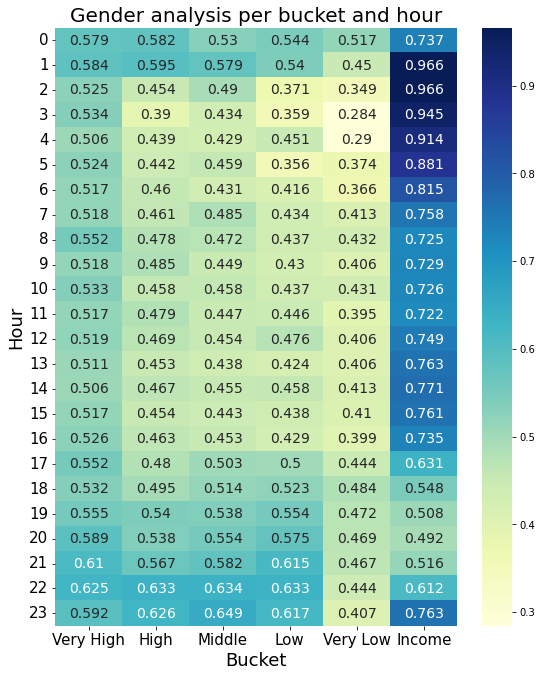

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

df = trans.copy()

df['tr_hour']=[int(s[1][:2]) for s in df['tr_datetime'].str.split(' ')]

df['amount_backet']=pd.qcut(df[df.amount<0].amount,5,labels=['Very High','High','Middle','Low','Very Low'])
df['amount_backet']=df['amount_backet'].cat.add_categories('Income').fillna('Income')

plot_pivot_table(df.pivot_table(index='tr_hour',columns='amount_backet',values='gender'))

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [14]:
# Type your code here
